In [1]:
# import data analysis libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Making a df with the movies metadata

In [2]:
movie_metadata = pd.read_csv('./archive/movies_metadata.csv')

movie_metadata.head()
movie_metadata.drop(['adult','genres', 'runtime','vote_average','vote_count', 'belongs_to_collection', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'spoken_languages', 'status', 'tagline', 'video'], axis=1, inplace=True)

/tmp/ipykernel_25554/273484007.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_metadata = pd.read_csv('./archive/movies_metadata.csv')


In [3]:
movie_metadata

,budget,id,popularity,release_date,revenue,title
0,30000000,862,21.946943,1995-10-30,373554033.0,Toy Story
1,65000000,8844,17.015539,1995-12-15,262797249.0,Jumanji
2,0,15602,11.7129,1995-12-22,0.0,Grumpier Old Men
3,16000000,31357,3.859495,1995-12-22,81452156.0,Waiting to Exhale
4,0,11862,8.387519,1995-02-10,76578911.0,Father of the Bride Part II
...,...,...,...,...,...,...
45461,0,439050,0.072051,NaN,0.0,Subdue
45462,0,111109,0.178241,2011-11-17,0.0,Century of Birthing
45463,0,67758,0.903007,2003-08-01,0.0,Betrayal
45464,0,227506,0.003503,1917-10-21,0.0,Satan Triumphant


In [4]:
ratings = pd.read_csv('./archive/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [5]:
# make a new df that only contains the movieId, movie title, and count of each rating
movie_ratings = ratings.groupby(['movieId', 'rating']).size().reset_index(name='count')
movie_ratings

# store this in a csv file
movie_ratings.to_csv('movie_ratings.csv', index=False)


In [6]:
movie_ratings

,movieId,rating,count
0,1,0.5,441
1,1,1.0,804
2,1,1.5,438
3,1,2.0,2083
4,1,2.5,1584
...,...,...,...
239376,176267,4.0,1
239377,176269,3.5,1
239378,176271,5.0,1
239379,176273,1.0,1


In [ ]:
# make a list of all movie ids that have more than 25% of their ratings >= 4.0 and more than 25% of their ratings <= 2.0
movie_ids = []
for movie in movie_ratings['movieId'].unique():
    movie_df = movie_ratings[movie_ratings['movieId'] == movie]
    if movie_df[movie_df['rating'] >= 4.0]['count'].sum() > movie_df['count'].sum() * 0.30 and movie_df[movie_df['rating'] <= 1.0]['count'].sum() > movie_df['count'].sum() * 0.30:
        movie_ids.append(movie)
movie_ids

In [ ]:
# make a list of all movie ids that have more than 25% of their ratings >= 4.0 and more than 25% of their ratings <= 2.0
polar_movie_ids = []
for movie in movie_ratings['movieId'].unique():
    movie_df = movie_ratings[movie_ratings['movieId'] == movie]
    if movie_df[movie_df['rating'] >= 4.0]['count'].sum() > movie_df['count'].sum() * 0.40 and movie_df[movie_df['rating'] <= 1.0]['count'].sum() > movie_df['count'].sum() * 0.40:
        polar_movie_ids.append(movie)
polar_movie_ids

In [24]:
# from movies_metadata make a dictionary of movie id as key and movie title as value
movie_titles = {}
for movie in movie_metadata['id']:
    movie_titles[movie] = movie_metadata[movie_metadata['id'] == movie]['title'].values[0]


In [ ]:
movie_ids

In [28]:
# convert all elements in movie_ids to strings
movie_ids = [str(i) for i in movie_ids]
polar_movie = []
for ids in movie_ids:
    try :
        polar_movie.append(movie_titles[ids])
    except:
        continue
polar_movie


['The Matrix Reloaded',
 'Sweet Movie',
 'The Big One',
 'The Millionairess',
 "Kathy Griffin: She'll Cut a Bitch",
 'The Slumber Party Massacre',
 'Macbeth',
 'An Average Little Man',
 'Legacy of Rage',
 'The Last of the Mohicans',
 'Baby Needs a New Pair of Shoes',
 "Angels' Alley",
 'Een Maand Later',
 'Paris Under Watch',
 'Holy Motors',
 'Mud',
 'A Day in the Death of Joe Egg',
 'The Comeback',
 'Toys in the Attic',
 'The Tenth Man',
 'Unman, Wittering and Zigo',
 'The Sessions',
 'Shocking Asia',
 'Hello Lonesome',
 'The Private Affairs of Bel Ami',
 'Marvel One-Shot: Item 47',
 'The Mind of Mr. Soames',
 'Mass Effect: Paragon Lost',
 'Macbeth',
 "Johanna d'Arc of Mongolia",
 'Giovannona Long-Thigh',
 'A Summer in La Goulette',
 'Lore',
 'Entertaining Mr. Sloane',
 'Journey to the Center of the Earth',
 'My Life and Times With Antonin Artaud',
 'A Hen in the Wind',
 'World War II: When Lions Roared',
 'Deep West',
 'Meet Me in Las Vegas',
 'A Conversation with Gregory Peck',
 'Th

In [32]:
# convert all elements in movie_ids to strings
movie_ids = [str(i) for i in movie_ids]
extreme_polar_movie = []
for ids in movie_ids:
    try :
        extreme_polar_movie.append(movie_titles[ids])
    except:
        continue
extreme_polar_movie


['The Matrix Reloaded',
 "Kathy Griffin: She'll Cut a Bitch",
 'Holy Motors',
 'The Comeback',
 'The Tenth Man',
 'The Sessions',
 'The Private Affairs of Bel Ami',
 'Macbeth',
 "Johanna d'Arc of Mongolia",
 'A Summer in La Goulette',
 'The Marshal of Finland',
 'Dead Before Dawn 3D',
 'Quarterback Princess',
 'The Couples',
 'The Conscientious Objector',
 'Gambling Lady',
 'Anita',
 'TalhotBlond',
 'Raakh',
 'Some Kind of a Nut',
 'A Matter of Dignity',
 'Pawn',
 'Calloused Hands',
 'Blindfold',
 'Unter Umständen verliebt',
 "Fultah Fisher's Boarding House",
 'A Madea Christmas']

In [33]:
len(extreme_polar_movie)

27

In [34]:
# add colums 0.5,1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5 to movie_ratings and add count of each rating to each column
movie_ratings['0.5'] = 0
movie_ratings['1'] = 0
movie_ratings['1.5'] = 0
movie_ratings['2'] = 0
movie_ratings['2.5'] = 0
movie_ratings['3'] = 0
movie_ratings['3.5'] = 0
movie_ratings['4'] = 0
movie_ratings['4.5'] = 0
movie_ratings['5'] = 0

for movie in movie_ratings['movieId'].unique():
    movie_df = movie_ratings[movie_ratings['movieId'] == movie]
    for rating in movie_df['rating']:
        movie_ratings.loc[(movie_ratings['movieId'] == movie) & (movie_ratings['rating'] == rating), rating] = movie_df[movie_df['rating'] == rating]['count'].values[0]
movie_ratings


KeyboardInterrupt: 

In [37]:
movie_titles
    

{'862': 'Toy Story',
 '8844': 'Jumanji',
 '15602': 'Grumpier Old Men',
 '31357': 'Waiting to Exhale',
 '11862': 'Father of the Bride Part II',
 '949': 'Heat',
 '11860': 'Sabrina',
 '45325': 'Tom and Huck',
 '9091': 'Sudden Death',
 '710': 'GoldenEye',
 '9087': 'The American President',
 '12110': 'Dracula: Dead and Loving It',
 '21032': 'Balto',
 '10858': 'Nixon',
 '1408': 'Cutthroat Island',
 '524': 'Casino',
 '4584': 'Sense and Sensibility',
 '5': 'Four Rooms',
 '9273': 'Ace Ventura: When Nature Calls',
 '11517': 'Money Train',
 '8012': 'Get Shorty',
 '1710': 'Copycat',
 '9691': 'Assassins',
 '12665': 'Powder',
 '451': 'Leaving Las Vegas',
 '16420': 'Othello',
 '9263': 'Now and Then',
 '17015': 'Persuasion',
 '902': 'The City of Lost Children',
 '37557': 'Shanghai Triad',
 '9909': 'Dangerous Minds',
 '63': 'Twelve Monkeys',
 '78802': 'Wings of Courage',
 '9598': 'Babe',
 '47018': 'Carrington',
 '687': 'Dead Man Walking',
 '139405': 'Across the Sea of Time',
 '33689': 'It Takes Two',
 

In [38]:
movie_ids

['604',
 '6253',
 '26016',
 '32230',
 '73365',
 '73411',
 '78064',
 '79010',
 '79281',
 '79866',
 '86162',
 '88488',
 '88801',
 '91012',
 '92479',
 '95650',
 '98523',
 '99147',
 '102201',
 '103071',
 '103328',
 '106682',
 '109518',
 '109669',
 '109929',
 '110108',
 '113043',
 '113947',
 '116223',
 '116821',
 '118536',
 '118852',
 '118995',
 '119627',
 '119844',
 '120268',
 '120313',
 '120763',
 '120871',
 '120911',
 '120925',
 '121493',
 '122337',
 '122665',
 '123310',
 '123405',
 '124269',
 '124446',
 '124997',
 '125371',
 '127062',
 '127272',
 '128143',
 '128243',
 '129421',
 '132553',
 '133135',
 '133329',
 '133343',
 '134346',
 '134433',
 '134653',
 '135222',
 '135547',
 '135579',
 '135739',
 '136481',
 '136560',
 '136780',
 '136872',
 '136876',
 '136878',
 '136880',
 '137339',
 '138070',
 '138198',
 '138964',
 '139064',
 '139243',
 '139509',
 '139547',
 '139952',
 '140046',
 '140415',
 '140761',
 '140864',
 '141357',
 '141894',
 '141938',
 '141980',
 '142216',
 '142965',
 '143645'

In [45]:
# make a new df that only contains the movieId, movie title, and count of each rating
movie_ratings = ratings.groupby(['movieId', 'rating']).size().reset_index(name='count')
movie_ratings

,movieId,rating,count
0,1,0.5,441
1,1,1.0,804
2,1,1.5,438
3,1,2.0,2083
4,1,2.5,1584
...,...,...,...
239376,176267,4.0,1
239377,176269,3.5,1
239378,176271,5.0,1
239379,176273,1.0,1


In [73]:
extreme_polar_movie_ids
# randomly sample 10 movies from extreme_polar_movie_ids
import random
random_movies = random.sample(extreme_polar_movie_ids, 10)
random_movies



['166627',
 '106682',
 '165739',
 '29275',
 '27883',
 '113947',
 '133448',
 '13775',
 '225728',
 '115427']

In [112]:
# movie_titles of extreme_polar_movie_ids
extreme_polar_movie_titles = []
for movie in extreme_polar_movie_ids:
    extreme_polar_movie_titles.append(movie_titles[str(movie)])
extreme_polar_movie_titles


['The Matrix Reloaded',
 "Kathy Griffin: She'll Cut a Bitch",
 'Holy Motors',
 'The Comeback',
 'The Tenth Man',
 'The Sessions',
 'The Private Affairs of Bel Ami',
 'Macbeth',
 'Macbeth',
 'Macbeth',
 'Macbeth',
 'Macbeth',
 'Macbeth',
 "Johanna d'Arc of Mongolia",
 'A Summer in La Goulette',
 'The Marshal of Finland',
 'Dead Before Dawn 3D',
 'Quarterback Princess',
 'The Couples',
 'The Conscientious Objector',
 'Gambling Lady',
 'Anita',
 'Anita',
 'Anita',
 'TalhotBlond',
 'Raakh',
 'Some Kind of a Nut',
 'A Matter of Dignity',
 'Pawn',
 'Calloused Hands',
 'Blindfold',
 'Unter Umständen verliebt',
 "Fultah Fisher's Boarding House",
 'A Madea Christmas',
 'A Madea Christmas']

In [80]:
movie_ratings

,movieId,rating,count
0,1,0.5,441
1,1,1.0,804
2,1,1.5,438
3,1,2.0,2083
4,1,2.5,1584
...,...,...,...
239376,176267,4.0,1
239377,176269,3.5,1
239378,176271,5.0,1
239379,176273,1.0,1


In [82]:
# make a dict of movie id as key and another list as value that contains the count of each rating
movie_ratings_dict = {}
for movie in movie_ratings['movieId'].unique():
    try:
        movie_df = movie_ratings[movie_ratings['movieId'] == movie]
        movie_ratings_dict[movie] = [movie_df[movie_df['rating'] == 0.5]['count'].values[0], movie_df[movie_df['rating'] == 1.0]['count'].values[0], movie_df[movie_df['rating'] == 1.5]['count'].values[0], movie_df[movie_df['rating'] == 2.0]['count'].values[0], movie_df[movie_df['rating'] == 2.5]['count'].values[0], movie_df[movie_df['rating'] == 3.0]['count'].values[0], movie_df[movie_df['rating'] == 3.5]['count'].values[0], movie_df[movie_df['rating'] == 4.0]['count'].values[0], movie_df[movie_df['rating'] == 4.5]['count'].values[0], movie_df[movie_df['rating'] == 5.0]['count'].values[0]]
    except:
        continue
movie_ratings_dict

{1: [441, 804, 438, 2083, 1584, 11577, 5741, 22020, 5325, 15995],
 2: [263, 797, 525, 2479, 1810, 8510, 2916, 6035, 690, 2035],
 3: [169, 772, 233, 1665, 616, 6213, 759, 3433, 154, 1483],
 4: [47, 351, 31, 496, 77, 1133, 66, 557, 12, 211],
 5: [237, 785, 270, 1716, 664, 6608, 723, 2959, 166, 1130],
 6: [41, 336, 66, 997, 387, 6657, 1878, 9381, 2158, 5994],
 7: [138, 402, 154, 1176, 469, 5950, 728, 4094, 239, 1807],
 8: [14, 85, 12, 178, 52, 663, 58, 317, 13, 129],
 9: [25, 309, 57, 585, 140, 2083, 87, 851, 17, 269],
 10: [156, 622, 215, 2001, 1021, 12067, 2793, 9759, 876, 3024],
 11: [69, 326, 91, 906, 434, 5633, 1148, 7107, 508, 3253],
 12: [103, 673, 117, 845, 231, 1408, 221, 563, 58, 256],
 13: [20, 66, 17, 155, 93, 632, 157, 426, 79, 193],
 14: [30, 248, 29, 472, 95, 2586, 265, 2175, 110, 797],
 15: [59, 424, 87, 531, 136, 1101, 135, 485, 29, 138],
 16: [69, 264, 92, 771, 482, 4190, 2005, 7078, 2081, 3485],
 17: [110, 517, 61, 789, 221, 4649, 1034, 8426, 963, 7522],
 18: [33, 300, 

In [83]:
extreme_polar_movie_ids

['604',
 '26016',
 '103328',
 '106682',
 '109669',
 '113947',
 '118536',
 '27883',
 '115427',
 '119844',
 '13775',
 '225728',
 '133448',
 '120268',
 '121493',
 '135547',
 '135579',
 '142216',
 '146132',
 '149586',
 '152986',
 '159137',
 '29275',
 '47397',
 '159389',
 '159636',
 '161076',
 '164421',
 '165739',
 '166627',
 '169066',
 '171873',
 '175553',
 '175555',
 '239650']

In [84]:
# make a df from movie_ratings_dict
movie_ratings_df = pd.DataFrame.from_dict(movie_ratings_dict, orient='index', columns=['0.5', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5'])
movie_ratings_df


,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5
1,441,804,438,2083,1584,11577,5741,22020,5325,15995
2,263,797,525,2479,1810,8510,2916,6035,690,2035
3,169,772,233,1665,616,6213,759,3433,154,1483
4,47,351,31,496,77,1133,66,557,12,211
5,237,785,270,1716,664,6608,723,2959,166,1130
...,...,...,...,...,...,...,...,...,...,...
172547,7,11,1,10,9,19,11,10,7,4
173209,3,2,3,7,9,21,22,12,2,1
173291,3,2,1,2,5,11,12,7,2,1
174055,2,1,1,3,7,18,36,83,68,63


In [89]:
# save movie ratings df to csv
movie_ratings_df.to_csv('movie_ratings_df.csv', index=False)

In [96]:
# randomly sample 10 movies from extreme_polar_movie_ids
import random
random_movies = random.sample(extreme_polar_movie_ids, 10)
random_movies

['118536',
 '115427',
 '166627',
 '159389',
 '133448',
 '27883',
 '159636',
 '149586',
 '175553',
 '152986']

In [116]:
# make a new df from movies_metadata.csv 
movie_metadata = pd.read_csv('./archive/movies_metadata.csv')

# drop columns belongs_to_collection, homepage, id, imdb_id, original_language, original_title, overview, poster_path, production_companies, production_countries, spoken_languages, status, tagline
movie_metadata = movie_metadata.drop(columns=['genres','belongs_to_collection', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'spoken_languages', 'status', 'tagline'])

# for adult = false, replace with 0, for adult = true, replace with 1
movie_metadata['adult'] = movie_metadata['adult'].replace({'False': 0, 'True': 1})
# for video = false, replace with 0, for video = true, replace with 1
movie_metadata['video'] = movie_metadata['video'].replace({'False': 0, 'True': 1})
# convert release_date to datetime
movie_metadata['release_date'] = pd.to_datetime(movie_metadata['release_date'], errors='coerce')
# remove the release date from df
movie_metadata = movie_metadata.drop(columns=['release_date'])

movie_metadata



/tmp/ipykernel_25554/3702666454.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_metadata = pd.read_csv('./archive/movies_metadata.csv')


,adult,budget,popularity,revenue,runtime,title,video,vote_average,vote_count
0,0,30000000,21.946943,373554033.0,81.0,Toy Story,False,7.7,5415.0
1,0,65000000,17.015539,262797249.0,104.0,Jumanji,False,6.9,2413.0
2,0,0,11.7129,0.0,101.0,Grumpier Old Men,False,6.5,92.0
3,0,16000000,3.859495,81452156.0,127.0,Waiting to Exhale,False,6.1,34.0
4,0,0,8.387519,76578911.0,106.0,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...
45461,0,0,0.072051,0.0,90.0,Subdue,False,4.0,1.0
45462,0,0,0.178241,0.0,360.0,Century of Birthing,False,9.0,3.0
45463,0,0,0.903007,0.0,90.0,Betrayal,False,3.8,6.0
45464,0,0,0.003503,0.0,87.0,Satan Triumphant,False,0.0,0.0


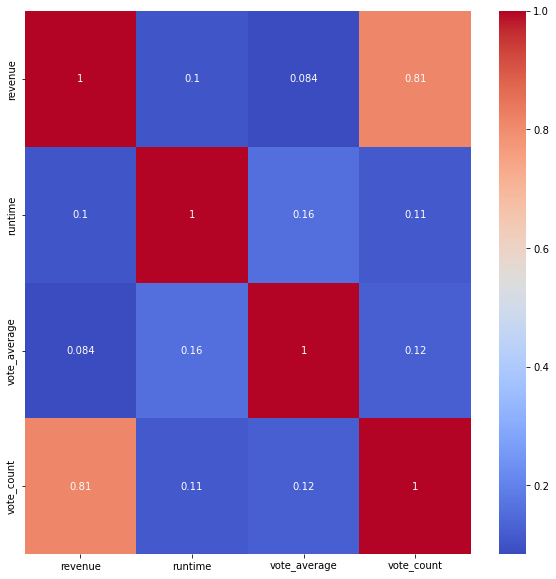

In [120]:
# make corr across all the features in movie_metadata
corr_matrix = movie_metadata.corr()
corr_matrix


# plot the correlation matrix as a heatmap for the movie_metadata df
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


